In [59]:
import sqlite3
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
conn = sqlite3.connect('exercise01.sqlite')
c = conn.cursor()

In [3]:
# Number 2
query = '''SELECT a.id, age, b.name, c.name, a.education_num, d.name, e.name, f.name, g.name, h.name, capital_gain, capital_loss, hours_week, i.name, over_50k FROM
           records a
           JOIN workclasses b
           ON a.workclass_id=b.id
           JOIN education_levels c
           ON a.education_level_id=c.id
           JOIN marital_statuses d
           ON a.marital_status_id=d.id
           JOIN occupations e
           ON a.occupation_id=e.id
           JOIN relationships f
           ON a.relationship_id=f.id
           JOIN races g
           ON a.race_id=g.id
           JOIN sexes h
           ON a.sex_id=h.id
           JOIN countries i
           ON a.country_id=i.id
        '''

In [4]:
# Number 3
header_row = ['id', 'age', 'workclass', 'education_level', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'country', 'over_50k']
with open('records.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row) # write table header to file
    for row in c.execute(query):
        writer.writerow(row)

In [44]:
# Number 4
df = pd.read_csv('records.csv')

In [6]:
# Number 5
print df[df['over_50k'] == 0].mean() # People making under 50k
print df[df['over_50k'] == 1].mean() # People making under 50k

id               24433.163881
age                 36.872184
education_num        9.598493
capital_gain       147.010308
capital_loss        54.151931
hours_week          38.840048
over_50k             0.000000
dtype: float64
id               24384.418499
age                 44.275178
education_num       11.602807
capital_gain      4042.239497
capital_loss       193.528964
hours_week          45.452896
over_50k             1.000000
dtype: float64


According to the above numbers, the average person making over 50k is older, more educated, and works more hours per week than the average person that makes less than 50k. Also, the average person making over 50k has a significantly higher capital gain (and loss) than someone that does not make over 50k.

In [8]:
# More detailed summary statistics
print df[df['over_50k'] == 0].describe() # People making under 50k
print df[df['over_50k'] == 1].describe() # People making under 50k

                 id           age  education_num  capital_gain  capital_loss  \
count  37155.000000  37155.000000   37155.000000  37155.000000  37155.000000   
mean   24433.163881     36.872184       9.598493    147.010308     54.151931   
std    14106.315882     14.104118       2.437673    936.753678    313.320005   
min        1.000000     17.000000       1.000000      0.000000      0.000000   
25%    12202.500000     25.000000       9.000000      0.000000      0.000000   
50%    24433.000000     34.000000       9.000000      0.000000      0.000000   
75%    36683.500000     46.000000      10.000000      0.000000      0.000000   
max    48841.000000     90.000000      16.000000  41310.000000   4356.000000   

         hours_week  over_50k  
count  37155.000000   37155.0  
mean      38.840048       0.0  
std       12.356849       0.0  
min        1.000000       0.0  
25%       35.000000       0.0  
50%       40.000000       0.0  
75%       40.000000       0.0  
max       99.000000    

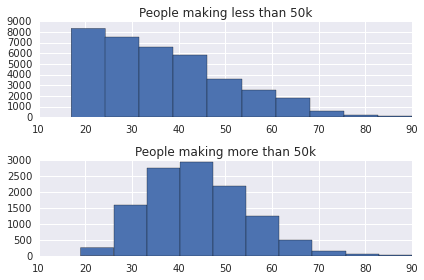

In [9]:
# Number 8
plt.figure(1)
plt.subplot(211)
df[df['over_50k'] == 0]['age'].hist()
plt.title('People making less than 50k')
plt.subplot(212)
df[df['over_50k'] == 1]['age'].hist()
plt.title('People making more than 50k')
plt.tight_layout()

In [45]:
# Number 6
y = df.pop('over_50k') # Remove "over_50k" from X and save as y
X = df

# Need to get dummy variables for string features
dummy_cols = ['workclass', 'education_level', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country']
for col in dummy_cols:
    # Add dummy variables to X
    X = pd.merge(X, pd.get_dummies(X[col]), how='inner', left_index=True, right_index=True)

# Drop columns that were dummified
X = X.drop(['id', 'workclass', 'education_level', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country'], axis=1)

# 80/20 splits
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all)

Have to get dummy variables for all categorical features, because sklearn requires continuous inputs. Simply converting the string values to a numeric code within the column would give the data an order that does not actually exist.

In [47]:
# Number 7
rf1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rf2 = RandomForestClassifier(n_estimators=1500, n_jobs=-1)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
ada1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                         algorithm='SAMME', n_estimators=1000)
ada1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [53]:
ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                         algorithm='SAMME', n_estimators=1500)
ada2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=1500, random_state=None)

In [56]:
print "Scores (Validation):"
print "rf1:", rf1.score(X_valid, y_valid)
print "rf2:", rf2.score(X_valid, y_valid)
print "ada1:", ada1.score(X_valid, y_valid)
print "ada2:", ada2.score(X_valid, y_valid)

Scores (Validation):
rf1: 0.850076435903
rf2: 0.85018563005
ada1: 0.866455557982
ada2: 0.863507316008


In [57]:
print "Scores (Test):"
print "rf1:", rf1.score(X_test, y_test)
print "rf2:", rf2.score(X_test, y_test)
print "ada1:", ada1.score(X_test, y_test)
print "ada2:", ada2.score(X_test, y_test)

Scores (Test):
rf1: 0.847023175825
rf2: 0.846859389075
ada1: 0.856113340431
ada2: 0.85185488494


In [62]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y_test.unique()))
    plt.xticks(tick_marks, ['<50k', '>50k'])
    plt.yticks(tick_marks, ['<50k', '>50k'])
    plt.grid(b=False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_test, ada1.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

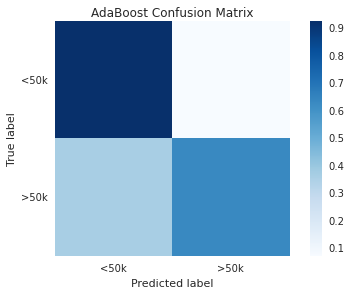

In [63]:
plot_confusion_matrix(cm_normalized, title='AdaBoost Confusion Matrix')

For the sake of time, I did not do normal tuning of model parameters to get best performance. Instead, I tried a few representative models to get an idea of what models work well. As can be seen in the confusion matrix plot above, the ada1 model (the model with the highest accuracy) does a great job of correctly predicting who makes less than 50k, but has a bit more trouble with predicting who makes over 50k. I would try tuning the model parameters to improve the performance. Possibly try dimensionality reduction (SVD) since the dummy variables greatly increased dimensionality.